<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


In [ ]:

class0 = np.random.randn(250, 2) + np.array([2, 2])

class1 = np.random.randn(250, 2) + np.array([7, 7])

X = np.vstack([class0, class1]).astype(np.float32)
y = np.array([0]*250 + [1]*250, dtype=np.float32)

X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y).view(-1, 1)


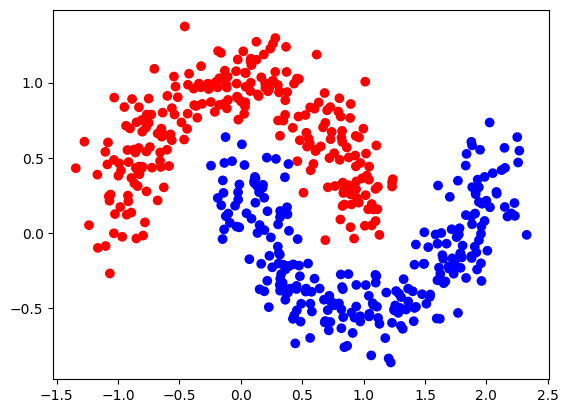

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr_r')

In [ ]:
X[0]

array([1.3497682, 0.617976 ], dtype=float32)

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(2, 1)

  def forward(self, X):
    z = self.layer(X)
    y_hat = torch.sigmoid(z)
    return y_hat

model = Model()


In [ ]:
X1 = X_train[0]

In [ ]:
model(X1)

tensor([-0.0475], grad_fn=<ViewBackward0>)

In [ ]:
params = list(model.parameters())
params

[Parameter containing:
 tensor([[ 0.5062,  0.2644],
         [-0.6998, -0.4587]], requires_grad=True),
 Parameter containing:
 tensor([0.3531, 0.1480], requires_grad=True)]

In [ ]:
params = list(model.parameters())
w1 =params[0].data[0,0]
w2= params[0].data[0,1]
b = params[1].data[0]
print("W1:", w1)
print("W2:", w2)
print("b:", b)

W1: tensor(-0.5454)
W2: tensor(-0.0390)
b: tensor(0.1062)


In [ ]:
params = list(model.parameters())
w1 =params[0].data[0,0]
w2= params[0].data[0,1]
b = params[1].data[0]
print("W1:", w1)
print("W2:", w2)
print("b:", b)

W1: tensor(0.7680)
W2: tensor(0.6412)
b: tensor(-5.8397)


/tmp/ipython-input-2289617535.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  x2_val = - (w1* x1_val / w2 + b / w2)


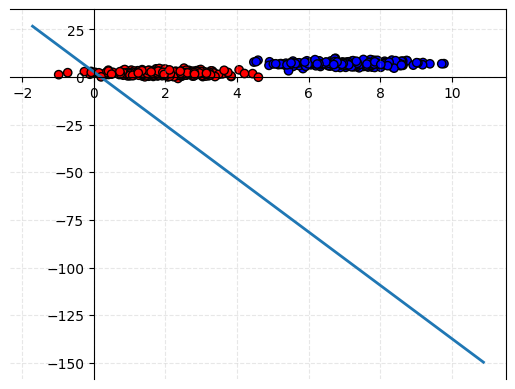

In [ ]:


x1_val = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100 )
x2_val = - (w1* x1_val / w2 + b / w2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr_r', edgecolors='k')

plt.plot(x1_val, x2_val, linewidth=2)

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.grid(True, linestyle='--', alpha=0.3)


In [ ]:
lf = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
for i in range(1000):
  y_hat = model(X_train)
  loss = lf(y_hat, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  print(loss.item())

0.3043631911277771
0.3026948571205139
0.301043301820755
0.2994081974029541
0.29778939485549927
0.2961866557598114
0.2945997714996338
0.29302850365638733
0.2914726734161377
0.2899320721626282
0.28840646147727966
0.28689566254615784
0.285399466753006
0.28391772508621216
0.28245019912719727
0.2809966802597046
0.2795570492744446
0.2781310975551605
0.2767186462879181
0.27531951665878296
0.2739335298538208
0.2725605070590973
0.27120035886764526
0.26985278725624084
0.26851776242256165
0.26719504594802856
0.26588448882102966
0.264585942029953
0.26329928636550903
0.2620243430137634
0.26076099276542664
0.25950902700424194
0.2582683861255646
0.2570388615131378
0.2558203339576721
0.25461268424987793
0.2534157633781433
0.2522294223308563
0.2510535717010498
0.2498880922794342
0.2487328052520752
0.24758762121200562
0.2464524209499359
0.24532704055309296
0.24421142041683197
0.2431054264307022
0.24200890958309174
0.24092179536819458
0.2398439347743988
0.23877528309822083
0.23771566152572632
0.236665025

/tmp/ipython-input-2289617535.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  x2_val = - (w1* x1_val / w2 + b / w2)


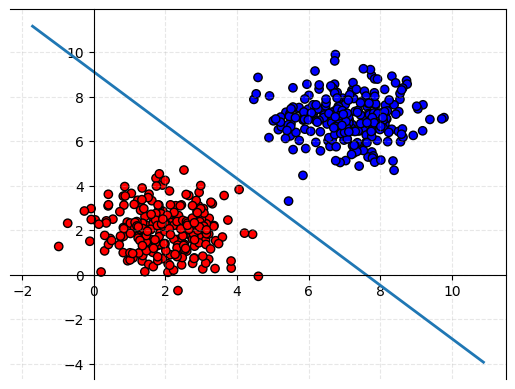

In [ ]:


x1_val = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100 )
x2_val = - (w1* x1_val / w2 + b / w2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr_r', edgecolors='k')

plt.plot(x1_val, x2_val, linewidth=2)

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.grid(True, linestyle='--', alpha=0.3)


In [ ]:
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Convert to float32 (important for PyTorch)
X = X.astype(np.float32)
y = y.astype(np.float32)

# Convert to PyTorch tensors
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y).view(-1, 1)

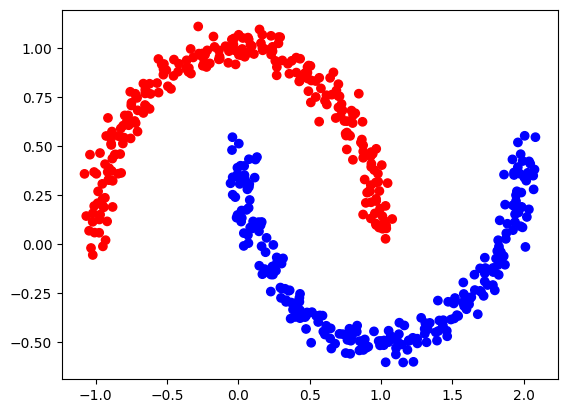

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr_r')

In [ ]:
def BCELoss(y_hat, y):
  eps = 1e-8
  return - torch.mean(y * torch.log(y_hat + eps)+ (1 - y)* torch.log(1-y_hat))

def sigmoid(z):
  return 1 / (1 + torch.exp(-z))

def relu(z):
    return torch.maximum(z, torch.zeros_like(z))


In [ ]:
# Neuron 1
w1 = torch.randn(1, 2, requires_grad=True)
b1 = torch.tensor(0., requires_grad=True)

# Neuron 2
w2 = torch.randn(1, 2, requires_grad=True)
b2 = torch.tensor(0., requires_grad=True)

# Neuron 3
w3 = torch.randn(1, 2, requires_grad=True)
b3 = torch.tensor(0., requires_grad=True)

In [ ]:
def forward(X):
  z1 = X @ w1.T + b1
  o1 = relu(z1)

  z2 = X @ w2.T + b2
  o2 = relu(z2)

  o = torch.stack([o1, o2], dim=1).reshape(-1, 2)
  z3 = o @ w3.T + b3
  return sigmoid(z3)


In [ ]:
lr = 0.5
for i in range(5000):
  y_hat = forward(X_train)
  loss = BCELoss(y_hat,  y_train)

  w1.grad = None
  b1.grad = None
  w2.grad = None
  b2.grad = None
  w3.grad = None
  b3.grad = None
  loss.backward()

  dw1 = w1.grad
  db1 = b1.grad

  dw2 = w2.grad
  db2 = b2.grad

  dw3 = w3.grad
  db3 = b3.grad

  w1.data -= lr * dw1
  b1.data -= lr * db1

  w2.data -= lr * dw2
  b2.data -= lr * db2

  w3.data -= lr * dw3
  b3.data -= lr * db3

  if i%100 ==0:
    print(loss.item())


0.6555347442626953
0.25603288412094116
0.24584268033504486
0.2426908016204834
0.2403971403837204
0.2357977330684662
0.22469818592071533
0.2126166969537735
0.20676396787166595
0.20443271100521088
0.20342743396759033
0.20290662348270416
0.20259298384189606
0.20237918198108673
0.20222054421901703
0.20209620893001556
0.2019963413476944
0.20191645622253418
0.2018446922302246
0.20178592205047607
0.20173592865467072
0.20169033110141754
0.20165078341960907
0.2016173005104065
0.20158517360687256
0.20155727863311768
0.20152997970581055
0.20150719583034515
0.20148247480392456
0.20146197080612183
0.20144309103488922
0.20142632722854614
0.2014094591140747
0.20139510929584503
0.20138037204742432
0.20136573910713196
0.2013542652130127
0.20134106278419495
0.20133022964000702
0.20131932199001312
0.20130982995033264
0.20129787921905518
0.20128799974918365
0.20127737522125244
0.20126578211784363
0.20125684142112732
0.20124781131744385
0.20123712718486786
0.2012285739183426
0.2012219876050949


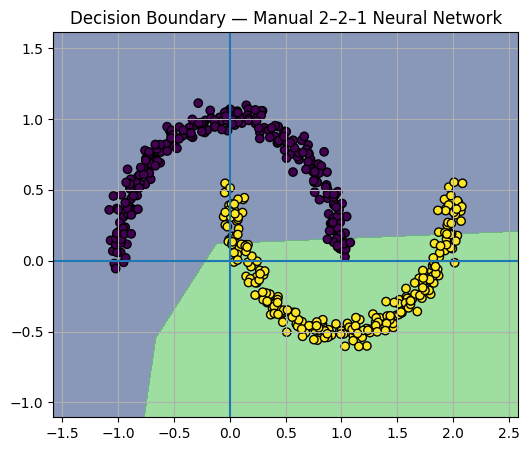

In [ ]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = torch.tensor(
    np.c_[xx.ravel(), yy.ravel()],
    dtype=torch.float32
)

with torch.no_grad():
    Z = forward(grid)

Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=0, alpha=0.6)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train.squeeze(),
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.title("Decision Boundary — Manual 2–2–1 Neural Network")
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)


lf = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [ ]:
for i in range(5000):
  y_hat = model(X_train)
  loss = lf(y_hat, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print(loss.item())

0.2054722011089325
0.2050986886024475
0.20472435653209686
0.20435011386871338
0.20397557318210602
0.20359966158866882
0.2032235711812973
0.20284593105316162
0.20246751606464386
0.20208792388439178
0.2017076015472412
0.20132692158222198
0.2009454369544983
0.20056281983852386
0.20017927885055542
0.19979587197303772
0.1994112879037857
0.19902585446834564
0.19863949716091156
0.19825232028961182
0.19786401093006134
0.19747485220432281
0.19708532094955444
0.19669421017169952
0.1963028460741043
0.19591087102890015
0.19551797211170197
0.1951243281364441
0.19472989439964294
0.19433456659317017
0.19393815100193024
0.19354099035263062
0.19314290583133698
0.19274424016475677
0.19234538078308105
0.19194595515727997
0.19154594838619232
0.1911449134349823
0.19074292480945587
0.19034036993980408
0.18993732333183289
0.18953342735767365
0.1891283392906189
0.18872232735157013
0.188316211104393
0.18790963292121887
0.1875021904706955
0.1870945394039154
0.18668591976165771
0.18627652525901794
0.185866400599

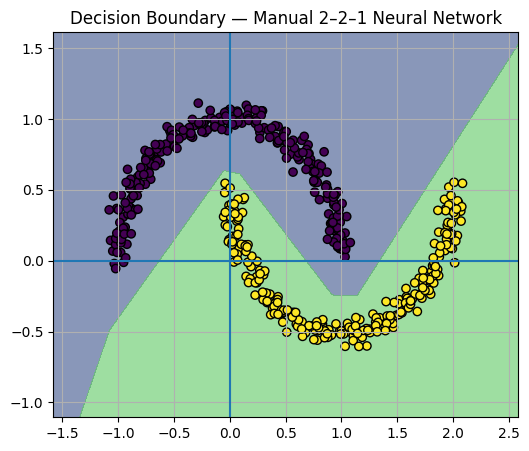

In [ ]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = torch.tensor(
    np.c_[xx.ravel(), yy.ravel()],
    dtype=torch.float32
)

with torch.no_grad():
    Z = model(grid)

Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=0, alpha=0.6)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train.squeeze(),
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.title("Decision Boundary — Manual 2–2–1 Neural Network")
plt.show()